# Import Libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import numpy as np

# Sleep Health and Lifestyle Dataset

In [36]:
filename = '/Users/macbookpro/Desktop/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(filename)
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

### Exploratory Data Analysis (EDA):

In [37]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [38]:
#How many features does it have?
print(df.shape[1])
#How many data samples?
print(df.shape[0])
#What are the values for each feature?
print(df.columns)
# What is the data type of each feature?
print(df.dtypes)

13
374
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [39]:
df.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
print(df.dropna)
# print(df.fillna(0))

<bound method DataFrame.dropna of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6

In [41]:
# Handle missing values
df.fillna("no disorder", inplace=True)
print("Sleep Disorder")
print(df['Sleep Disorder'].unique())

Sleep Disorder
['no disorder' 'Sleep Apnea' 'Insomnia']


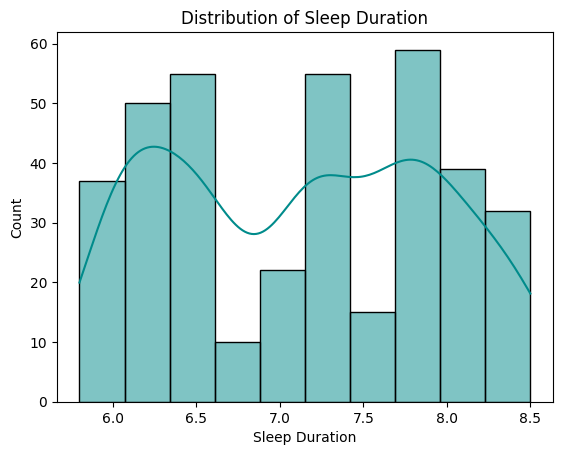

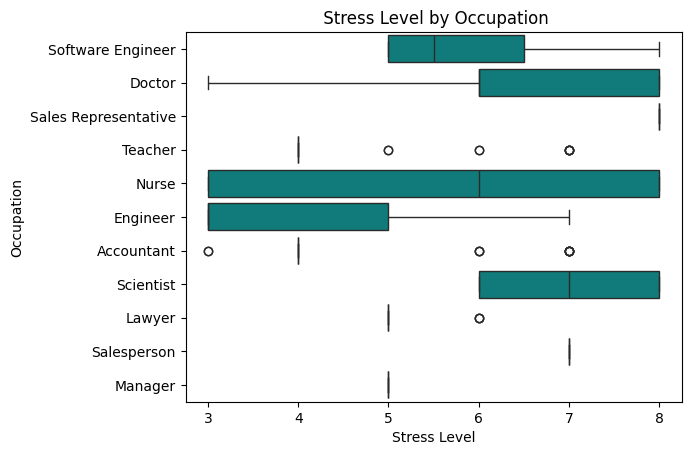

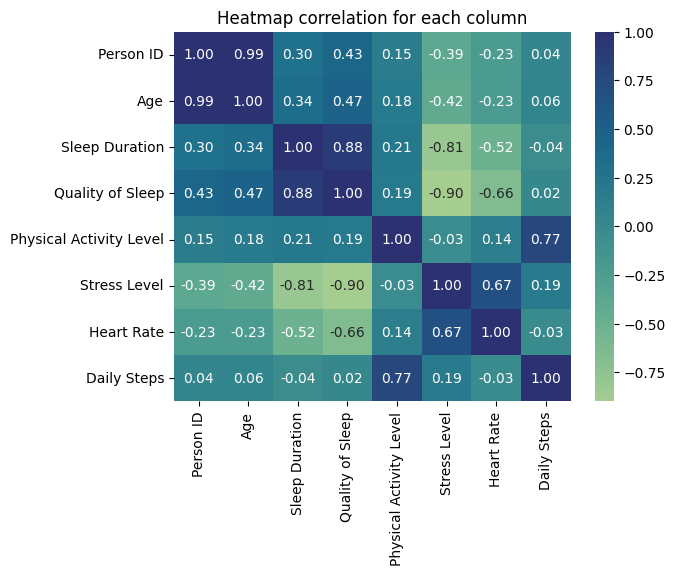

In [42]:
# [Hist Plot] --> sleep Distribution
sns.histplot(df, x='Sleep Duration', kde=True , color='darkcyan')
plt.title("Distribution of Sleep Duration")
plt.show()

# [Box plot] --> Stress Level by Occupation
sns.boxplot(x=df["Stress Level"], y=df["Occupation"] ,color='darkcyan')
plt.title(' Stress Level by Occupation')
plt.show()

# [Heatmap] --> Correlation For Each Column
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap correlation for each column')
plt.show()

### Checking for Normality in Distribution

In [43]:
def check_normality(data):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print("p-value: %.4f" % p_value_normality)
    
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

p-value: 0.0000
Reject null hypothesis >> The data is not normally distributed


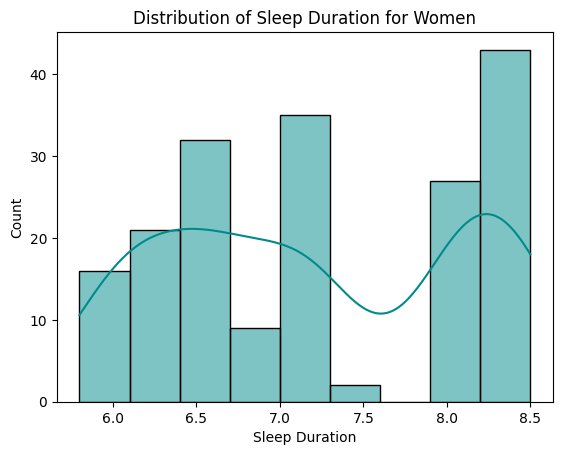

In [44]:
#[A] Does women’s sleep duration follow a normal distribution?
check_normality(df[df['Gender'] == 'Female'] ['Sleep Duration'])
sns.histplot(df[df['Gender'] == 'Female'], x='Sleep Duration', kde=True , color='darkcyan')
plt.title("Distribution of Sleep Duration for Women")
plt.show()

In [45]:
#[B] Is having higher daily steps a contributing factor into better sleep? 
print(df[['Daily Steps', 'Quality of Sleep']].corr() , '\n')
_, p_value = stats.pearsonr(df['Daily Steps'], df['Quality of Sleep'])
print("Result = ",df['Daily Steps'].corr(df['Quality of Sleep']))
print("p-value:", p_value)
if p_value < 0.05:
        print("Reject null hypothesis")
else:
        print("Fail to reject null hypothesis")

                  Daily Steps  Quality of Sleep
Daily Steps          1.000000          0.016791
Quality of Sleep     0.016791          1.000000 

Result =  0.01679141492471579
p-value: 0.7461906652960792
Fail to reject null hypothesis


just for stress level::
p-value: 0.0000
Reject null hypothesis >> The data is not normally distributed


Occupation
Accountant              4.59459
Doctor                  6.73239
Engineer                3.88889
Lawyer                  5.06383
Manager                 5.00000
Nurse                   5.54795
Sales Representative    8.00000
Salesperson             7.00000
Scientist               7.00000
Software Engineer       6.00000
Teacher                 4.52500
Name: Stress Level, dtype: float64 

p-value: 0.7075
Fail to reject null hypothesis >> The data is normally distributed


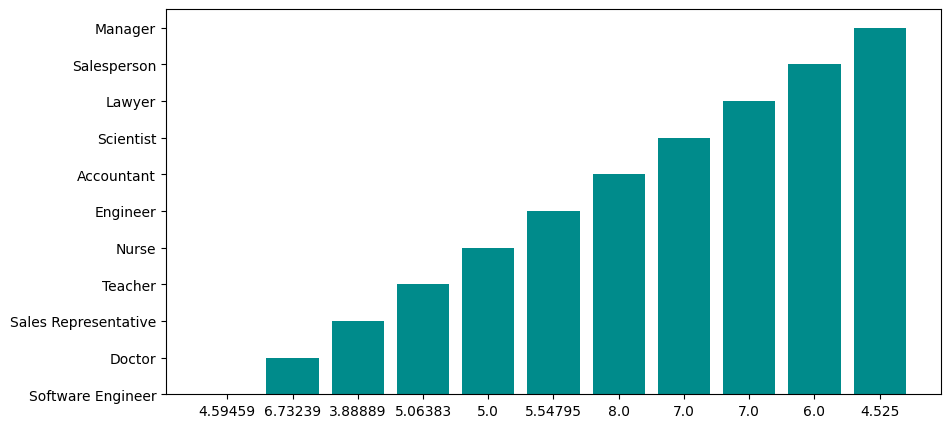

In [46]:
#[C] Is stress level different among different occupations? 
print("just for stress level::")
check_normality(df["Stress Level"])
print('\n')
avg = df.groupby("Occupation")["Stress Level"].mean().round(5)
print(avg, '\n')
check_normality(avg)
y_pos = np.arange(len(avg))
plt.figure(figsize=(10, 5)) 
plt.bar(y_pos, df['Occupation'].unique() ,color='darkcyan')
plt.xticks(y_pos, avg)
plt.show()

In [47]:
#[D] Are different BMI categories significantly different given their blood pressure?
blood_pressure = df['Blood Pressure'].str.split('/' , expand=True)
numerator = blood_pressure[0]
denominator = blood_pressure[1]

anova_numerator = stats.f_oneway(
    numerator[df['BMI Category'] == 'Normal Weight'],
    numerator[df['BMI Category'] == 'Normal'],
    numerator[df['BMI Category'] == 'Overweight'],
    numerator[df['BMI Category'] == 'Obese']
)

anova_denominator = stats.f_oneway(
    denominator[df['BMI Category'] == 'Normal Weight'],
    denominator[df['BMI Category'] == 'Normal'],
    denominator[df['BMI Category'] == 'Overweight'],
    denominator[df['BMI Category'] == 'Obese']
)
print("ANOVA for Upper Blood Pressure:", anova_numerator)
print("ANOVA for Below Blood Pressure:", anova_denominator)

ANOVA for Upper Blood Pressure: F_onewayResult(statistic=163.545195439236, pvalue=1.7438768080834315e-67)
ANOVA for Below Blood Pressure: F_onewayResult(statistic=179.09700388935002, pvalue=1.0189415858614994e-71)


T-statistic =  nan
P-value =  nan
People without sleep disorders have higher heart rates


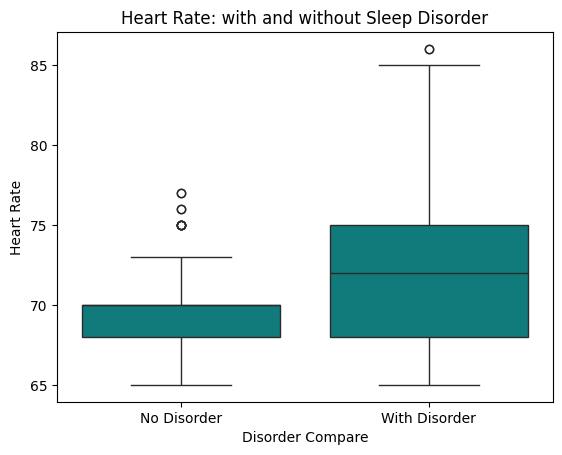

In [48]:
#[e] Do people with sleep disorders have higher heart rates than those without any sleep disorder?
has_disorder = df[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])]["Heart Rate"]
has_no_disorder = df[df['Sleep Disorder'].isnull()]["Heart Rate"]
mean_disorder = has_disorder.mean()
mean_no_disorder = has_no_disorder.mean()

t_stat, p_value = stats.ttest_ind(has_disorder.dropna(), has_no_disorder.dropna(), equal_var=False)  
print("T-statistic = ", t_stat)
print("P-value = ", p_value)

if mean_disorder > mean_no_disorder:
    print("People with sleep disorders have higher heart rates")
else:
    print("People without sleep disorders have higher heart rates")

df['Disorder Compare'] = df['Sleep Disorder'].apply(lambda x: 'With Disorder' if x in ['Sleep Apnea', 'Insomnia'] else 'No Disorder')

sns.boxplot(x='Disorder Compare', y='Heart Rate', data=df , color='darkcyan')
plt.title('Heart Rate: with and without Sleep Disorder')
plt.show()


# 3. [Bonus]
Question ::
            `Does physical activity level influence heart rate?`


In [49]:
median_activity = df["Physical Activity Level"].median()
low_activity = df[df["Physical Activity Level"] < median_activity]["Heart Rate"]
high_activity = df[df["Physical Activity Level"] >= median_activity]["Heart Rate"]

u_stat, p_value = stats.mannwhitneyu(low_activity.dropna(), high_activity.dropna(), alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis >> Physical activity level significantly influences heart rate")
else:
    print("Fail to reject null hypothesis >> Physical activity level doesn't significantly influences heart rate")

Mann-Whitney U Statistic: 17895.0000
P-value: 0.4615
Fail to reject null hypothesis >> Physical activity level doesn't significantly influences heart rate


# Student Performance Factors Dataset

In [50]:
filename = '/Users/macbookpro/Desktop/StudentPerformanceFactors.csv'
df2 = pd.read_csv(filename)
print(df2)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

In [51]:
#How many features does it have?
print(df2.shape[1])
#How many data samples?
print(df2.shape[0] , '\n')
#What are the values for each feature?
print(df2.columns , '\n')
# What is the data type of each feature?
print(df2.dtypes , '\n')
df2.isnull()

20
6607 

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object') 

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physica

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
# Handle missing values by droping rows
cleaned_df = df2.dropna()
print(f"latest >> : {df2.shape}")
print(f"new >> : {cleaned_df.shape}")

latest >> : (6607, 20)
new >> : (6378, 20)


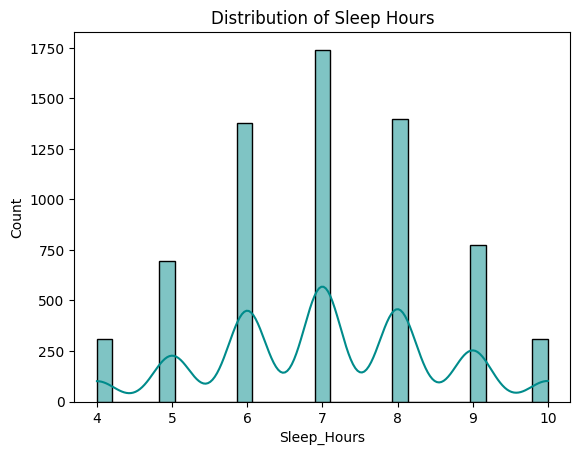

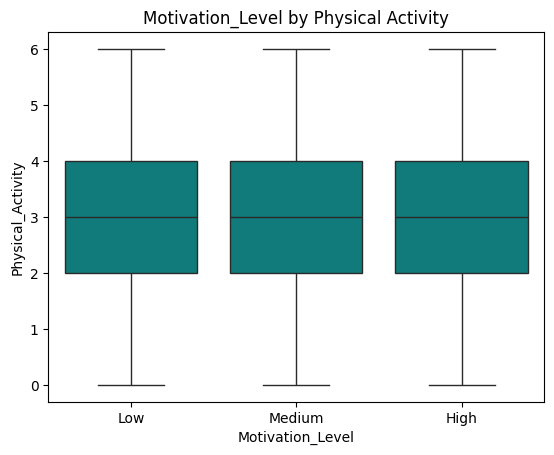

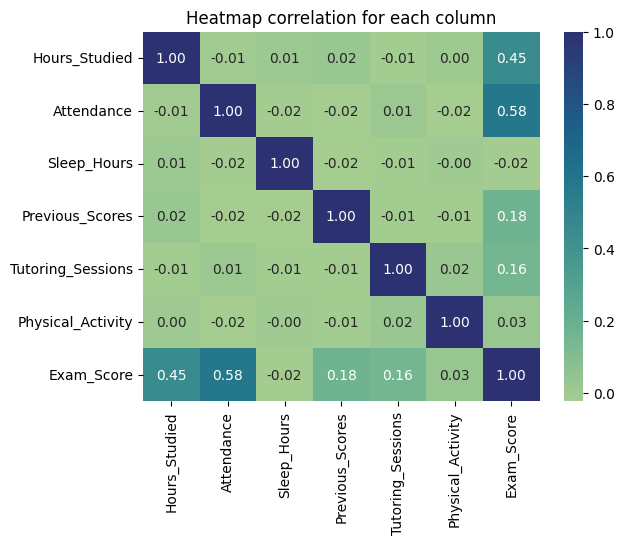

In [53]:
# [Hist Plot] --> sleep Hours Distribution
sns.histplot(df2, x='Sleep_Hours', kde=True , color='darkcyan')
plt.title("Distribution of Sleep Hours")
plt.show()

# [Box plot] --> Motivation Level by Physical Activity
sns.boxplot(x=df2["Motivation_Level"], y=df2["Physical_Activity"] ,color='darkcyan')
plt.title('Motivation_Level by Physical Activity')
plt.show()

# [Heatmap] --> Correlation For Each Column
sns.heatmap(df2.select_dtypes(include=['number']).corr(), annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap correlation for each column')
plt.show()

p-value: 0.0001
Reject null hypothesis >> The data is not normally distributed


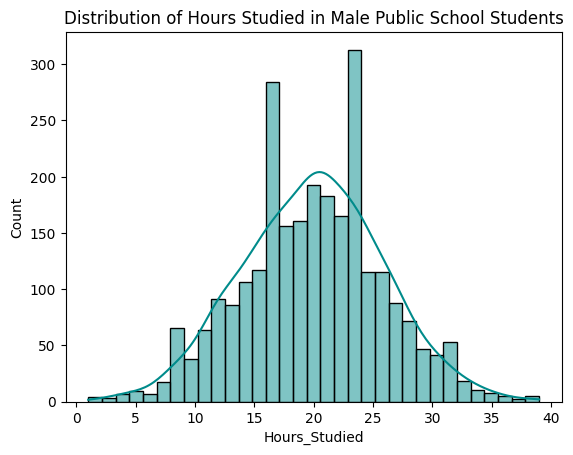

In [54]:
# 1) Do the hours spent in public school by males follow a normal distribution?
male_public_school = df2[(df2['School_Type'] == 'Public') & (df2['Gender'] == 'Male')]
check_normality(male_public_school['Hours_Studied'])
sns.histplot(male_public_school['Hours_Studied'],  kde=True , color='darkcyan')
plt.title("Distribution of Hours Studied in Male Public School Students")
plt.show()

                 Teacher_Quality  Exam_Score
Teacher_Quality         1.000000    0.076387
Exam_Score              0.076387    1.000000 

Result =  0.07638720155795795
p-value: 6.405898549878319e-10
Reject null hypothesis


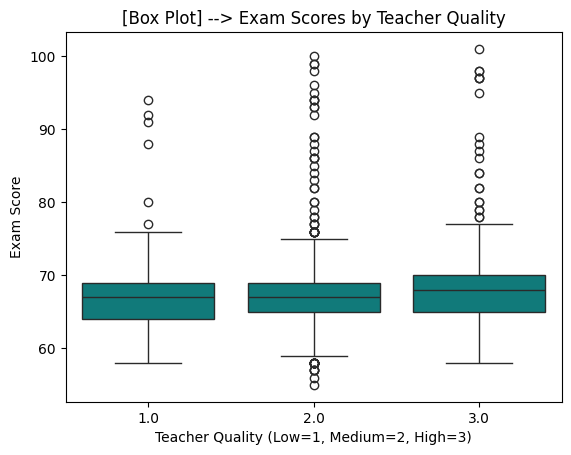

In [55]:
# 2) Is having higher teacher quality a contributing factor to higher exam scores?
df2['Teacher_Quality'] = df2['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3})
print(df2[['Teacher_Quality', 'Exam_Score']].corr() , '\n')
print("Result = ",df2['Teacher_Quality'].corr(df2['Exam_Score']))
df2 = df2.replace([np.inf, -np.inf], np.nan) 
df2 = df2.dropna(subset=['Teacher_Quality', 'Exam_Score']) 
_, p_value = stats.pearsonr(df2['Teacher_Quality'], df2['Exam_Score'])
print("p-value:", p_value)
if p_value < 0.05:
        print("Reject null hypothesis")
else:
        print("Fail to reject null hypothesis")

sns.boxplot(x=df2['Teacher_Quality'], y=df2['Exam_Score'] , color='darkcyan')
plt.xlabel("Teacher Quality (Low=1, Medium=2, High=3)")
plt.ylabel("Exam Score")
plt.title("[Box Plot] --> Exam Scores by Teacher Quality")
plt.show()


In [56]:
# 3) Does the number of tutoring sessions significantly impact exam scores?
stat, p = stats.pearsonr(df2['Tutoring_Sessions'], df2['Exam_Score'])
print(f'Pearson Correlation={stat}, p={p}')
if p > 0.05:
    print('Has no strong effect on exam scores')
else:
    print('It affects exam scores')

Pearson Correlation=0.15606109453300177, p=7.118972187930279e-37
It affects exam scores


In [57]:
# 4) Is there a significant difference in the distribution of Peer Influence and Motivation Level?
df2['Peer_Influence'] = df2['Peer_Influence'].map({'Negative': 1, 'Neutral': 2, 'Positive': 3})
df2['Motivation_Level'] = df2['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

stat, p = stats.wilcoxon(df2['Peer_Influence'], df2['Motivation_Level'])
print(f'Wilcoxon Test Statistic = {stat:.3f}, p-value = {p:.3f}')

if p > 0.05:
    print("Fail to reject null hypothesis >> Distributions are equal")
else:
    print("Reject null hypothesis >> Distributions are not equal")

Wilcoxon Test Statistic = 2910175.000, p-value = 0.000
Reject null hypothesis >> Distributions are not equal


In [58]:
# 5) Is there a significant difference in the distribution of Peer Influence, Motivation Level, and Stress Level across different age groups?
school_types = df2['School_Type'].unique()

for school_type in school_types:
    group_data = df2[df2['School_Type'] == school_type]
    
    if len(group_data) >= 3: 
        stat, p = stats.friedmanchisquare(group_data['Peer_Influence'],
                                     group_data['Motivation_Level'],
                                     group_data['Physical_Activity'])
        
        print(f"School Type: {school_type}")
        print(f"Friedman Test Statistic = {stat}, p-value = {p}")
        
        if p > 0.05:
            print("Fail to reject null hypothesis >> Distributions are equal")
        else:
            print("Reject null hypothesis >> Distributions are not equal")
    else:
        print(f"School Type: {school_type} has insufficient data for the Friedman test")


School Type: Public
Friedman Test Statistic = 2420.259145689225, p-value = 0.0
Reject null hypothesis >> Distributions are not equal
School Type: Private
Friedman Test Statistic = 1104.4862834748542, p-value = 1.4583134272226378e-240
Reject null hypothesis >> Distributions are not equal
